In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [18]:
data = pd.read_csv('/var/ml/workspace/Batch-2/class4/autompgtrain.csv')
data.head(5)

,mpg_target,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
data.corr()

,mpg_target,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg_target,1.000000,-0.775396,-0.804203,-0.772373,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.840020,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.894648,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.772373,0.840020,0.894648,1.000000,0.861463,-0.685311,-0.412561,-0.453095
weight,-0.831741,0.896017,0.932824,0.861463,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.685311,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.412561,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453095,-0.581024,0.205873,0.180662,1.000000


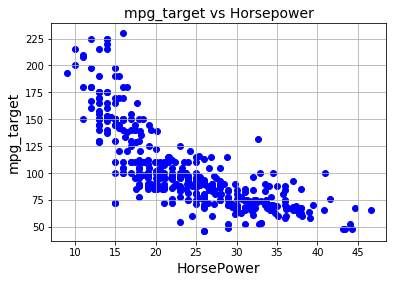

In [21]:
plt.scatter(data['mpg_target'], data['horsepower'], color='blue')
plt.title('mpg_target vs Horsepower', fontsize=14)
plt.xlabel('HorsePower', fontsize=14)
plt.ylabel('mpg_target', fontsize=14)
plt.grid(True)
plt.show()

In [26]:
df = pd.DataFrame(data, columns=['mpg_target', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'
                                , 'model year', 'origin'])
X = data[[ 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'
                                , 'model year', 'origin']]
Y = data['mpg_target']

regr = LinearRegression()
regr.fit(X,Y)
print ("Intercept:" , regr.intercept_)
print("Coefficients: ", regr.coef_)

Intercept: -17.993702476518344
Coefficients:  [-0.41923279  0.01895833 -0.01181326 -0.00670957  0.10069544  0.75634781
  1.42032503]


In [32]:
test_data = pd.read_csv('/var/ml/workspace/Batch-2/class4/testautompg.csv')
test_data.head(5)
test_data_X = test_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'
                                , 'model year', 'origin']]
y_predict =  regr.predict(test_data_X)
print(y_predict)
output_csv_predict = pd.DataFrame(y_predict, columns=['mpg_target'])
output_csv_predict.to_csv('./output_autompg.csv', header= True,index=False)

[28.46559936 31.72546412 30.74464401 27.51854038 28.25959997 34.60093969
 31.10688776 29.37229081 28.76104039]


In [33]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict() 
 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             mpg_target   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Fri, 13 Sep 2019   Prob (F-statistic):          2.21e-141
Time:                        12:33:54   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.9937      4.592     -3.918   

/var/ml/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
